In [1]:
import pandas as pd

In [2]:
 X = pd.read_csv('C:\\Users\\suleiman\\Documents\\scikit\\csv_files\\Output_48.csv', header = None )

In [3]:
from sklearn.cross_validation import train_test_split

C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
X, y = X.iloc[:,1:].values, X.iloc[:,0].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
sc = StandardScaler ()

In [8]:
X_train_std = sc.fit_transform(X_train)

In [9]:
X_test_std = sc.fit_transform(X_test)

In [10]:
import numpy as np

In [11]:
cov_mat = np.cov(X_train_std.T)

In [12]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [13]:
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[  1.54514862e+01   1.04650338e+01   6.62581152e+00   4.24263812e+00
   2.50436519e+00   1.99401554e+00   1.39252470e+00   1.10954347e+00
   8.63145891e-01   6.78096318e-01   5.99234064e-01   4.27130258e-01
   3.63296831e-01   2.22828597e-01   2.13678475e-01   1.65356253e-01
   1.13106052e-01   1.01802110e-01   9.54519992e-02   7.38175376e-02
   6.38700983e-02   5.62966749e-02   4.70175565e-02   4.04026540e-02
   3.73337476e-02   2.46693872e-02   2.21044242e-02   1.75622861e-02
   1.39156710e-02   1.08235390e-02   8.16656932e-03   7.55005633e-03
   5.50790181e-03   3.15505785e-03   2.43083965e-03   1.64445675e-03
   1.01486771e-03   8.26322048e-04   7.44578412e-04   4.31998142e-04
   3.32097550e-04   1.26986264e-04   8.17079638e-05   5.25016081e-05
   4.80921628e-05   7.07074876e-07  -1.49087009e-19   4.93364078e-20]


In [14]:
tot = sum(eigen_vals)

In [15]:
var_exp = [(i / tot) for i in
          sorted(eigen_vals, reverse=True)]

In [16]:
cum_var_exp = np.cumsum(var_exp)

In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.bar(range(1,49), var_exp, alpha=0.5, align='center',
       label='individual explained variance')

<Container object of 48 artists>

In [19]:
plt.step(range(1,49), cum_var_exp, where='mid',
        label='cummulative explained variance')

In [20]:
plt.ylabel('Explained variance ratio')

In [21]:
plt.xlabel('principal components')

In [22]:
plt.legend(loc='best')

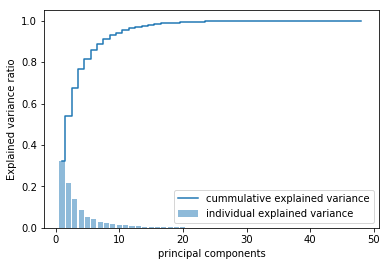

In [23]:
plt.show()

In [24]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i])
              for i in range(len(eigen_vals))]

In [25]:
eigen_pairs.sort(reverse=True)

In [26]:
w=np.hstack((eigen_pairs[0][1][:, np.newaxis],
             eigen_pairs[1][1][:, np.newaxis]))

In [27]:
print ('Matrix W:\n',w)

Matrix W:
 [[ 0.20940552  0.13171256]
 [ 0.09627288  0.055859  ]
 [ 0.22225553  0.04293865]
 [ 0.22771014  0.02514669]
 [ 0.20255855  0.00043774]
 [-0.175347   -0.15231644]
 [ 0.05377113 -0.10670981]
 [-0.18147092 -0.07114737]
 [-0.18227522 -0.07459145]
 [-0.16760922 -0.17357439]
 [ 0.11777603  0.20322569]
 [ 0.14743062  0.15384688]
 [ 0.13718588  0.16946702]
 [-0.03040327  0.2285635 ]
 [-0.05317861 -0.19898694]
 [ 0.13716498  0.16956251]
 [ 0.1415999   0.16944643]
 [-0.02794212  0.20807986]
 [-0.0405573  -0.07871521]
 [ 0.06726745 -0.03472344]
 [ 0.16716664 -0.07222988]
 [ 0.18307099 -0.17945867]
 [ 0.02587199 -0.22588624]
 [-0.04832043 -0.08590276]
 [ 0.17545996 -0.20048616]
 [ 0.02605538 -0.20510197]
 [ 0.17254008 -0.203581  ]
 [ 0.02590757 -0.20005247]
 [-0.04940519 -0.22153813]
 [ 0.19257001 -0.15908705]
 [ 0.02425786 -0.18159034]
 [ 0.12423408 -0.21592703]
 [ 0.19009096 -0.17622079]
 [ 0.18426756 -0.1845054 ]
 [ 0.22885459 -0.00600296]
 [ 0.23217892 -0.04652835]
 [ 0.00969817  0.

In [28]:
X_train_std[0].dot(w)

array([-2.31733638, -3.04107722])

In [29]:
X_train_pca = X_train_std.dot(w)

In [30]:
colors = ['b', 'r']

In [31]:
markers = ['o', 'x']

In [32]:
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)

In [33]:
plt.xlabel('PAC 1')

In [34]:
plt.ylabel('PAC 2')

In [35]:
plt.legend(loc='lower left')

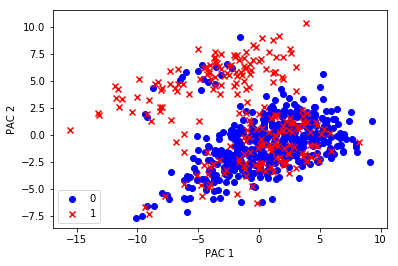

In [36]:
plt.show()

In [37]:
from matplotlib.colors import ListedColormap

In [38]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #set marker generator and color map
    markers = ('x','o')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [142]:
pca = PCA(n_components=2)
lr = SVC(kernel='rbf', C=10.0, gamma=0.1)

In [40]:
pca = PCA(n_components=2)
lr = LogisticRegression()

In [143]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [144]:
lr.fit(X_train_pca, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [145]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)

In [146]:
plt.xlabel('PC1')

In [147]:
plt.ylabel('PC2')

In [148]:
plt.legend(loc='lower left')

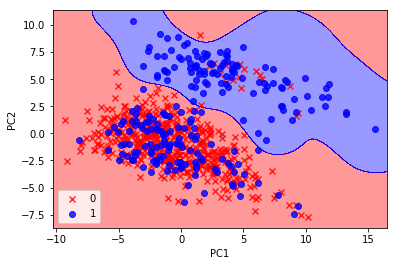

In [149]:
plt.show()

In [150]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)

In [151]:
plt.xlabel('PC1')

In [152]:
plt.ylabel('PC2')

In [153]:
plt.legend(loc='lower left')

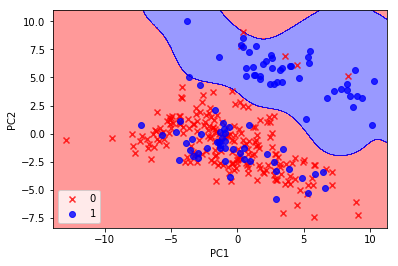

In [154]:
plt.show()

In [155]:
pca = PCA(n_components=None)

In [156]:
X_train_pca = pca.fit_transform(X_train_std)

In [157]:
pca.explained_variance_ratio_

array([  3.21447406e-01,   2.17710965e-01,   1.37841105e-01,
         8.82623849e-02,   5.20999524e-02,   4.14828138e-02,
         2.89696052e-02,   2.30825610e-02,   1.79565904e-02,
         1.41068827e-02,   1.24662595e-02,   8.88587105e-03,
         7.55790238e-03,   4.63564952e-03,   4.44529354e-03,
         3.44001465e-03,   2.35301941e-03,   2.11785611e-03,
         1.98575058e-03,   1.53567468e-03,   1.32873157e-03,
         1.17117667e-03,   9.78137082e-04,   8.40522924e-04,
         7.76678451e-04,   5.13213450e-04,   4.59852843e-04,
         3.65359762e-04,   2.89496835e-04,   2.25169185e-04,
         1.69894501e-04,   1.57068776e-04,   1.14584496e-04,
         6.56367389e-05,   5.05703524e-05,   3.42107128e-05,
         2.11129590e-05,   1.71905198e-05,   1.54899533e-05,
         8.98714084e-06,   6.90884325e-06,   2.64177859e-06,
         1.69982439e-06,   1.09222541e-06,   1.00049282e-06,
         1.47097426e-08,   2.39451434e-33,   2.39451434e-33])

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [159]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', LogisticRegression(random_state=1))])

In [160]:
from sklearn.cross_validation import StratifiedKFold

In [161]:
kfold = StratifiedKFold(y=y_train, n_folds=10, random_state=1)

In [162]:
scores = []

In [163]:
for k, (train, test) in enumerate (kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
                                    np.bincount(y_train[train]), score))

Fold: 1, Class dist.: [427 204], Acc: 0.761
Fold: 2, Class dist.: [427 204], Acc: 0.761
Fold: 3, Class dist.: [427 204], Acc: 0.831
Fold: 4, Class dist.: [427 204], Acc: 0.817
Fold: 5, Class dist.: [427 204], Acc: 0.761
Fold: 6, Class dist.: [428 204], Acc: 0.814
Fold: 7, Class dist.: [428 204], Acc: 0.757
Fold: 8, Class dist.: [428 205], Acc: 0.797
Fold: 9, Class dist.: [428 205], Acc: 0.841
Fold: 10, Class dist.: [428 205], Acc: 0.826


In [164]:
print ('CV accuracy: %.4f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy: 0.7965 +/- 0.032


In [165]:
from sklearn.cross_validation import cross_val_score

In [166]:
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)

In [167]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [ 0.76056338  0.76056338  0.83098592  0.81690141  0.76056338  0.81428571
  0.75714286  0.79710145  0.84057971  0.82608696]


In [168]:
print('CV accuracy: %.3f +/- %.4f' %(np.mean(scores), np.std(scores)))

CV accuracy: 0.796 +/- 0.0319


In [169]:
from sklearn.learning_curve import learning_curve

In [170]:
pipe_lr = Pipeline ([('scl', StandardScaler()),
                    ('clf', LogisticRegression(
                                penalty='l2', random_state=0))])

In [171]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                    X=X_train,
                                                    y=y_train,
                                                    train_sizes=np.linspace(0.1, 1.0, 10),
                                                    cv=10,
                                                    n_jobs=1)

In [172]:
train_mean = np.mean(train_scores, axis=1)

In [173]:
train_std = np.std(train_scores, axis=1)

In [174]:
test_mean = np.mean(test_scores, axis=1)

In [175]:
test_std = np.std(test_scores, axis=1)

In [176]:
plt.plot(train_sizes, train_mean,
        color='blue', marker='o', markersize=5,
        label='training accuracy')

In [177]:
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')

In [178]:
plt.plot(train_sizes, test_mean,
        color='green', linestyle='--', marker='s', 
        markersize=5, label='validation accuracy')

In [179]:
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

In [180]:
plt.grid()

In [181]:
plt.xlabel('Number of training samples')

In [182]:
plt.ylabel('Accuracy')

In [183]:
plt.legend(loc='lower right')

plt.ylim([0.6, 1.0])

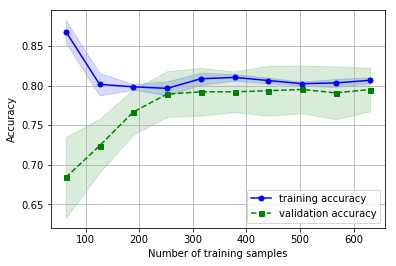

In [184]:
plt.show()

In [185]:
from sklearn.learning_curve import validation_curve

In [186]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [187]:
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                            X=X_train,
                                            y=y_train,
                                            param_name='clf__C',
                                            param_range=param_range,
                                            cv=10)

In [188]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [189]:
plt.plot(param_range, train_mean,
        color='blue', marker='o', markersize=5,
        label='training accuracy')

In [190]:
plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')

In [191]:
plt.plot(param_range, test_mean,
        color='green', linestyle='--', marker='s', 
        markersize=5, label='validation accuracy')

In [192]:
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

In [193]:
plt.grid()

In [194]:
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])

(0.7, 1.0)

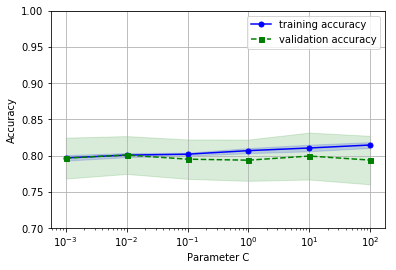

In [195]:
plt.show()

In [196]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [197]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(random_state=1))])

In [198]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [199]:
param_grid = [{'clf__C': param_range,
              'clf__kernel': ['linear']},
             {'clf__C': param_range,
              'clf__gamma': param_range,
              'clf__kernel': ['rbf']}]

In [200]:
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10, n_jobs=-1)

In [201]:
gs = gs.fit(X_train, y_train)

In [202]:
print(gs.best_score_)

0.8262108262108262


In [203]:
print(gs.best_params_)

{'clf__C': 10.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


In [204]:
clf = gs.best_estimator_

In [205]:
clf.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [206]:
print ('Test Accuracy: %.4f' %clf.score(X_test, y_test))

Test Accuracy: 0.8907


In [207]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1)

In [106]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=10)

In [208]:
print('CV accuracy: %.3f +/- %.4f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.796 +/- 0.0319


In [108]:
from sklearn.tree import DecisionTreeClassifier

In [209]:
gs = GridSearchCV (estimator=SVC(random_state=0),
                  param_grid=param_grid,
                  scoring ='accuracy', cv=10
                  )

In [210]:
gs = GridSearchCV (estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}],
                  scoring ='accuracy', cv=10
                  )

In [211]:
scores = cross_val_score (gs,X_train,y_train,scoring='accuracy',cv=2)

In [111]:
scores = cross_val_score (gs,X_train,y_train,scoring='accuracy',cv=10)

In [212]:
print('CV accuracy: %.3f +/- %.4f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.782 +/- 0.0077


In [213]:
from sklearn.metrics import confusion_matrix

In [214]:
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [215]:
y_pred = pipe_svc.predict(X_test)

In [216]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [217]:
print(confmat)

[[206   5]
 [ 47  44]]


In [218]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))

In [219]:
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

In [220]:
for i in range (confmat.shape[0]):
    for j in range (confmat.shape[1]):
        ax.text (x=j, y=i,
        s=confmat[i,j],
        va='center', ha='center')

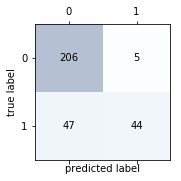

In [221]:
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [222]:
y_pred2 = pipe_svc.predict(X_train)
confmat2 = confusion_matrix(y_true=y_train, y_pred=y_pred2)
print(confmat2)

[[463  12]
 [119 108]]


In [223]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range (confmat2.shape[0]):
    for j in range (confmat2.shape[1]):
        ax.text (x=j, y=i,
        s=confmat2[i,j],
        va='center', ha='center')

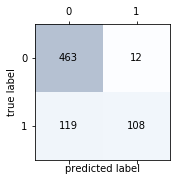

In [224]:
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [225]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [226]:
print('Precision: %.4f' %precision_score(y_true=y_test, y_pred=y_pred))

Precision: 0.8980


In [227]:
print('Recall: %.4f' %recall_score(y_true=y_test, y_pred=y_pred))

Recall: 0.4835


In [228]:
print('F1: %.4f' %f1_score(y_true=y_test, y_pred=y_pred))

F1: 0.6286


In [229]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [230]:
pipe_lr = Pipeline([('slc', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0))])

In [231]:
X_train2 = X_train[:, [0,2]]

In [232]:
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)

In [233]:
fig = plt.figure(figsize=(7,5))

In [234]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr  = []

In [235]:
for i, (train, test) in enumerate (cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)'
                                    % (i+1, roc_auc))

In [236]:
plt.plot([0,1],[0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guess')

In [237]:
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

In [238]:
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area=%0.2f)' % mean_auc, lw=2)

In [239]:
plt.plot ([0,0,1],[0,0,1], lw=2, linestyle=':', color='black', label='perfect performance')

In [240]:
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristics')
plt.legend(loc="lower right")

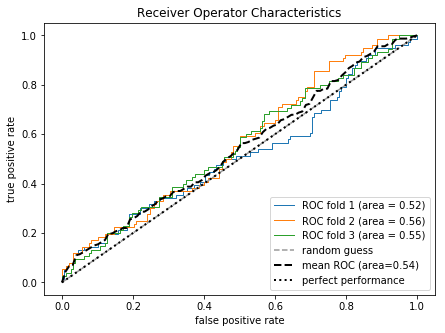

In [241]:
plt.show()

In [142]:
print('Precision: %.3f' %precision_score(y_true=y_train, y_pred=y_pred2))

Precision: 0.859


In [143]:
print('Recall: %.3f' %recall_score(y_true=y_train, y_pred=y_pred2))

Recall: 0.884


In [144]:
print('F1: %.3f' %f1_score(y_true=y_train, y_pred=y_pred2))

F1: 0.871
